In [32]:
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
import tensorflow as tf

In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [3]:
x_train = x_train / 255
x_test = x_test / 255

In [4]:
model = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(256, activation='relu'),
    Dense(512, activation='relu'),
    Dense(10, activation='softmax'),
])

In [5]:
model.compile(
    optimizer='Adam',
    loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 512)               131584    
                                                                 
 dense_2 (Dense)             (None, 10)                5130      
                                                                 
Total params: 337,674
Trainable params: 337,674
Non-trainable params: 0
_________________________________________________________________


In [7]:
x_val = x_train[:30000]
partial_x_train = x_train[30000:]

y_val = y_train[:30000]
partial_y_train = y_train[30000:]

In [8]:
history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val)
)

Epoch 1/20


C:\Users\Dmytro\anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


59/59 [==============================] - 6s 74ms/step - loss: 0.7198 - accuracy: 0.7537 - val_loss: 0.4914 - val_accuracy: 0.8310
Epoch 2/20
59/59 [==============================] - 4s 68ms/step - loss: 0.4471 - accuracy: 0.8443 - val_loss: 0.4154 - val_accuracy: 0.8514
Epoch 3/20
59/59 [==============================] - 4s 67ms/step - loss: 0.4025 - accuracy: 0.8567 - val_loss: 0.4056 - val_accuracy: 0.8560
Epoch 4/20
59/59 [==============================] - 4s 62ms/step - loss: 0.3682 - accuracy: 0.8696 - val_loss: 0.3779 - val_accuracy: 0.8661
Epoch 5/20
59/59 [==============================] - 3s 53ms/step - loss: 0.3357 - accuracy: 0.8801 - val_loss: 0.3570 - val_accuracy: 0.8722
Epoch 6/20
59/59 [==============================] - 3s 60ms/step - loss: 0.3287 - accuracy: 0.8822 - val_loss: 0.3473 - val_accuracy: 0.8770
Epoch 7/20
59/59 [==============================] - 4s 62ms/step - loss: 0.3018 - accuracy: 0.8915 - val_loss: 0.3403 - val_accuracy: 0.8786
Epoch 8/20
59/59 [======

In [9]:
scores = model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.3625 - accuracy: 0.8780


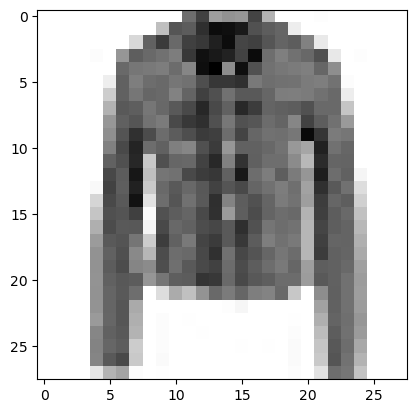

In [28]:
plt.imshow(x_test[0].reshape(28, 28), cmap=plt.cm.binary)
plt.show()

In [29]:
image = x_test[0]
image = (np.expand_dims(image,0))
image.shape

(1, 28, 28)

In [30]:
predictions = model.predict(image)
predictions

1/1 [==============================] - 0s 33ms/step


array([[4.6498639e-07, 7.6992416e-07, 8.6641180e-08, 1.4180242e-07,
        1.7744374e-06, 2.1103420e-04, 1.3805646e-06, 4.8361663e-03,
        2.1310273e-06, 9.9494606e-01]], dtype=float32)

In [31]:
prediction = predictions[0]
np.argmax(prediction)

9